<a href="https://colab.research.google.com/github/Harshapriya123/DL-Lab/blob/master/2019207029_Back_Propagation_Keras_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import sklearn.metrics, math
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('/content/bigmart_sales_data.csv')

In [3]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### 1) Preprocessing

In [4]:
print('Data shape:', data.shape)

Data shape: (8523, 12)


#### Handling NA values

In [5]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Item_Weight** and **Outlet Size** have null values. We shall explore the datatype and the remove them.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)

In [8]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### Handling Categorical Value

In [10]:
le_obj = LabelEncoder()

Handling **Item_Identifier**

In [11]:
data['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
FDG09     9
FDP25     9
DRN47     9
         ..
FDC23     1
FDK57     1
FDT35     1
FDN52     1
FDY43     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [12]:
data.drop('Item_Identifier', axis=1, inplace=True)
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Handling **Item_Fat_Content**

In [13]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
# Replacing 'low fat', 'LF' with 'Low Fat'
data.Item_Fat_Content.replace('LF','Low Fat',inplace=True)
data.Item_Fat_Content.replace('low fat','Low Fat',inplace=True)
# Replacing 'reg' with 'Regular' 
data.Item_Fat_Content.replace('reg','Regular',inplace=True)

In [15]:
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [16]:
data['Item_Fat_Content']= le_obj.fit_transform (data['Item_Fat_Content'])
data['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

Handling **Item_Type**

In [17]:
data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [18]:
data['Item_Type']= le_obj.fit_transform (data['Item_Type'])
data['Item_Type'].value_counts()

6     1232
13    1200
9      910
5      856
4      682
3      649
0      648
8      520
14     445
10     425
1      251
7      214
11     169
15     148
2      110
12      64
Name: Item_Type, dtype: int64

Handling **Outlet_Identifier**

In [19]:
data['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [20]:
data['Outlet_Identifier']= le_obj.fit_transform (data['Outlet_Identifier'])
data['Outlet_Identifier'].value_counts()

5    935
1    932
6    930
9    930
8    930
7    929
3    928
2    926
0    555
4    528
Name: Outlet_Identifier, dtype: int64

Handling **Outlet_Size**

In [21]:
data['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [22]:
data['Outlet_Size']= le_obj.fit_transform (data['Outlet_Size'])
data['Outlet_Size'].value_counts()

1    5203
2    2388
0     932
Name: Outlet_Size, dtype: int64

Handling **Outlet_Location_Type**

In [23]:
data['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [24]:
data['Outlet_Location_Type']= le_obj.fit_transform (data['Outlet_Location_Type'])
data['Outlet_Location_Type'].value_counts()

2    3350
1    2785
0    2388
Name: Outlet_Location_Type, dtype: int64

Handling **Outlet_Type**

In [25]:
data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [27]:
data['Outlet_Type']= le_obj.fit_transform (data['Outlet_Type'])
data['Outlet_Type'].value_counts()

1    5577
0    1083
3     935
2     928
Name: Outlet_Type, dtype: int64

Handling **Outlet_Establishment_Year**

In [28]:
data['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [29]:
data['Outlet_Establishment_Year']= le_obj.fit_transform (data['Outlet_Establishment_Year'])
data['Outlet_Establishment_Year'].value_counts()

0    1463
1     932
6     930
4     930
2     930
5     929
8     928
7     926
3     555
Name: Outlet_Establishment_Year, dtype: int64

#### Visualizing Processed data

In [32]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,9,4,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,3,8,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,9,4,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,0,3,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1,1,0,2,1,994.7052


In [33]:
data.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.021157,-0.012049,0.028015,0.024756,-0.007975,-0.007489,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.021157,1.000000,0.047314,-0.139434,0.006063,0.000764,0.002447,-0.000622,-0.001598,0.002199,0.018719
Item_Visibility,-0.012049,0.047314,1.000000,-0.035249,-0.001315,-0.100439,-0.082927,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,0.028015,-0.139434,-0.035249,1.000000,0.032651,0.001656,0.006527,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.024756,0.006063,-0.001315,0.032651,1.000000,0.003319,0.004162,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.007975,0.000764,-0.100439,0.001656,0.003319,1.000000,-0.030969,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.007489,0.002447,-0.082927,0.006527,0.004162,-0.030969,1.000000,0.070786,0.042005,-0.040040,-0.025525
Outlet_Size,-0.007225,-0.000622,0.069309,-0.001859,0.006059,0.504603,0.070786,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.004088,-0.001598,-0.028099,0.003084,0.000232,-0.716176,0.042005,-0.614311,1.000000,0.467219,0.089367
Outlet_Type,-0.000566,0.002199,-0.173468,0.003053,-0.001975,0.099873,-0.040040,-0.201483,0.467219,1.000000,0.401522


#### Preparing Input & Output Vector

In [34]:
X = data.drop('Item_Outlet_Sales', axis=1)
y = data['Item_Outlet_Sales']

#### Test - Train Split of input dataset

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print('Training data shape', x_train.shape)
print('Testing data shape', x_test.shape)

Training data shape (5966, 10)
Testing data shape (2557, 10)


### 2) Build Model

In [36]:
model = keras.models.Sequential()

model.add(keras.layers.normalization.BatchNormalization())

# add input layer
model.add(keras.layers.Dense(units=100, input_dim=x_train.shape[1], activation='relu'))

# add hidden layer
model.add(keras.layers.Dense(units=50, input_dim=100, activation='relu'))

# add output layer
model.add(keras.layers.Dense(units=1, input_dim=50, activation='relu'))

#### Custom Loss function for regression

In [37]:
def rmse(y_true, y_pred):
    return keras.backend.sqrt(keras.backend.mean(keras.backend.square(y_pred - y_true), axis=-1))

In [38]:
def mse(y_true, y_pred):
    return keras.backend.mean(keras.backend.square(y_pred - y_true), axis=-1)

In [39]:
def r_2(y_true, y_pred):
    SS_res = keras.backend.sum(keras.backend.square(y_true - y_pred))
    SS_tot = keras.backend.sum(keras.backend.square(y_true - keras.backend.mean(y_true)))
    return 1 - (1 - SS_res/(SS_tot - keras.backend.epsilon()))

### 3) Testing the model and Visualizing the model performance

#### Model 1 - Learning rate = 0.001

In [42]:
model.compile(optimizer=keras.optimizers.SGD(lr=0.001),
              loss="mean_squared_error",
              metrics=["mean_squared_error", rmse, r_2])
early_stop = keras.callbacks.EarlyStopping(monitor="mean_squared_error", patience=40, verbose=False, mode='auto')
result = model.fit(x_train, y_train, epochs=300, batch_size=1024, 
                   validation_data=(x_test, y_test), callbacks=[early_stop], verbose=False);

In [43]:
y_pred = model.predict(x_test)

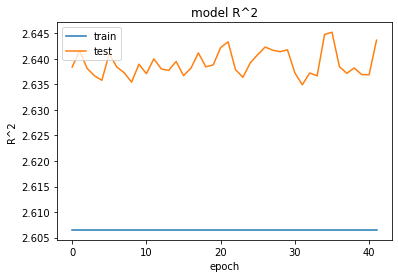

In [44]:
plt.plot(result.history['val_r_2'])
plt.plot(result.history['r_2'])
plt.title('model R^2')
plt.xlabel('epoch')
plt.ylabel('R^2')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

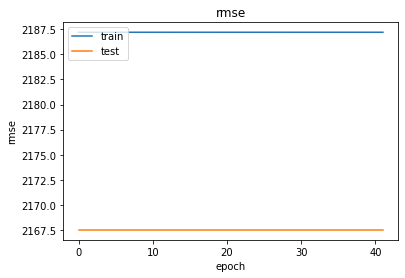

In [45]:
plt.plot(result.history['rmse'])
plt.plot(result.history['val_rmse'])
plt.title('rmse')
plt.xlabel('epoch')
plt.ylabel('rmse')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
regressor = LinearRegression()
regressor.fit(y_test.values.reshape(-1, 1), y_pred)
y_fit = regressor.predict(y_pred)

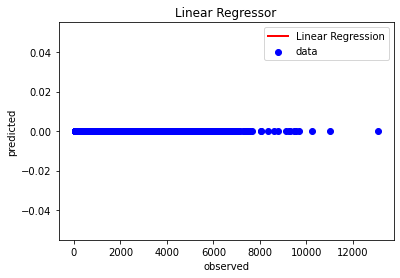

In [47]:
plt.scatter(y_test, y_pred, color='blue', label='data')
plt.plot(y_pred, y_fit, color='red', linewidth=2, label='Linear Regression')
plt.title('Linear Regressor')
plt.legend()
plt.xlabel('observed')
plt.ylabel('predicted')
plt.show()

In [48]:
print("Mean Absolute Error (MAE): %f" % sklearn.metrics.mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): %f" % math.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred)))
print("R square (R^2): %f" % sklearn.metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 2167.523747
Root Mean Squared Error (RMSE): 2752.204846
R square (R^2): -1.633306


#### Model 2 - Learning rate = 0.01

In [56]:
model.compile(optimizer=keras.optimizers.SGD(lr=0.01),
              loss="mean_squared_error",
              metrics=["mean_squared_error", rmse, r_2])
early_stop = keras.callbacks.EarlyStopping(monitor="mean_squared_error", patience=40, verbose=False, mode='auto')
result = model.fit(x_train, y_train, epochs=300, batch_size=1024,
                   validation_data=(x_test, y_test), callbacks=[early_stop], verbose=False);

In [57]:
y_pred = model.predict(x_test)

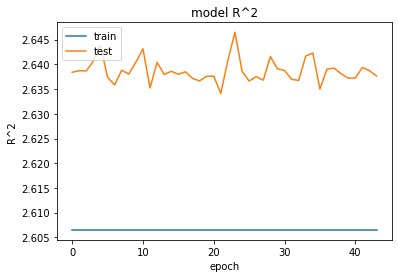

In [58]:
plt.plot(result.history['val_r_2'])
plt.plot(result.history['r_2'])
plt.title('model R^2')
plt.xlabel('epoch')
plt.ylabel('R^2')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

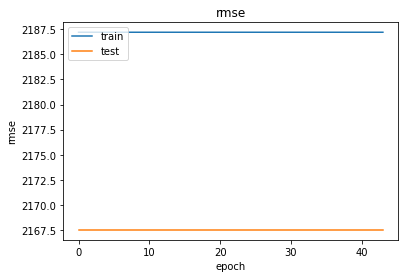

In [59]:
plt.plot(result.history['rmse'])
plt.plot(result.history['val_rmse'])
plt.title('rmse')
plt.xlabel('epoch')
plt.ylabel('rmse')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [61]:
regressor = LinearRegression()
regressor.fit(y_test.values.reshape(-1, 1), y_pred)
y_fit = regressor.predict(y_pred)

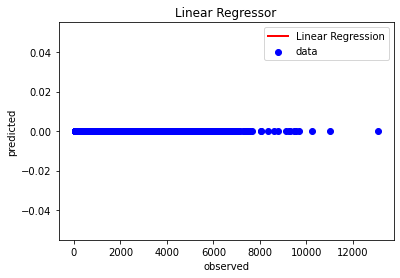

In [62]:
plt.scatter(y_test, y_pred, color='blue', label='data')
plt.plot(y_pred, y_fit, color='red', linewidth=2, label='Linear Regression')
plt.title('Linear Regressor')
plt.legend()
plt.xlabel('observed')
plt.ylabel('predicted')
plt.show()

In [63]:
print("Mean Absolute Error (MAE): %f" % sklearn.metrics.mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): %f" % math.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred)))
print("R square (R^2): %f" % sklearn.metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 2167.523747
Root Mean Squared Error (RMSE): 2752.204846
R square (R^2): -1.633306


### 4) Trying Different Activation function

#### Using tanh for hidden layers

In [64]:
model = keras.models.Sequential()

model.add(keras.layers.normalization.BatchNormalization())

# add input layer
model.add(keras.layers.Dense(units=100, input_dim=x_train.shape[1], activation='tanh'))

# add hidden layer
model.add(keras.layers.Dense(units=50, input_dim=100, activation='tanh'))

# add output layer
model.add(keras.layers.Dense(units=1, input_dim=50, activation='relu'))

In [65]:
model.compile(optimizer=keras.optimizers.SGD(lr=0.001),
              loss="mean_squared_error",
              metrics=["mean_squared_error", rmse, r_2])
early_stop = keras.callbacks.EarlyStopping(monitor="mean_squared_error", patience=40, verbose=False, mode='auto')
result = model.fit(x_train, y_train, epochs=300, batch_size=1024, 
                   validation_data=(x_test, y_test), callbacks=[early_stop], verbose=False);


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [66]:
y_pred = model.predict(x_test)

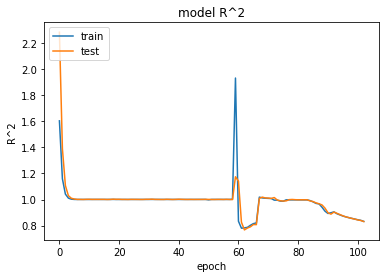

In [68]:
plt.plot(result.history['val_r_2'])
plt.plot(result.history['r_2'])
plt.title('model R^2')
plt.xlabel('epoch')
plt.ylabel('R^2')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

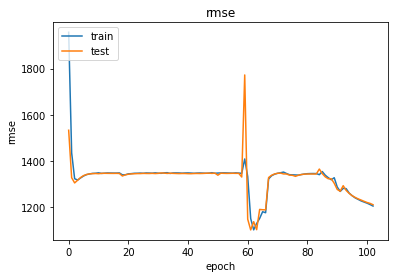

In [69]:
plt.plot(result.history['rmse'])
plt.plot(result.history['val_rmse'])
plt.title('rmse')
plt.xlabel('epoch')
plt.ylabel('rmse')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [70]:
regressor = LinearRegression()
regressor.fit(y_test.values.reshape(-1, 1), y_pred)
y_fit = regressor.predict(y_pred)

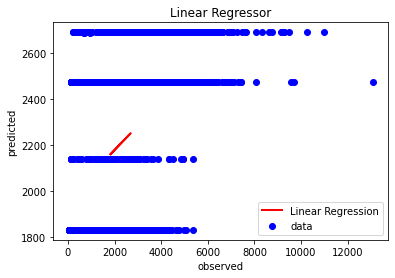

In [71]:
plt.scatter(y_test, y_pred, color='blue', label='data')
plt.plot(y_pred, y_fit, color='red', linewidth=2, label='Linear Regression')
plt.title('Linear Regressor')
plt.legend()
plt.xlabel('observed')
plt.ylabel('predicted')
plt.show()

In [72]:
print("Mean Absolute Error (MAE): %f" % sklearn.metrics.mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): %f" % math.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred)))
print("R square (R^2): %f" % sklearn.metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 1210.942370
Root Mean Squared Error (RMSE): 1547.495208
R square (R^2): 0.167473


#### Using elu for hidden layers

**Exponential Linear Unit**<br>

The exponential linear unit (ELU) with alpha > 0 is: x if x > 0 and<br>
alpha * (exp(x) - 1) if x < 0 <br>
The ELU hyperparameter alpha controls the value to which an ELU saturates for negative net inputs. ELUs diminish the vanishing gradient effect.

In [73]:
model = keras.models.Sequential()

model.add(keras.layers.normalization.BatchNormalization())

# add input layer
model.add(keras.layers.Dense(units=100, input_dim=x_train.shape[1], activation='elu'))

# add hidden layer
model.add(keras.layers.Dense(units=50, input_dim=100, activation='elu'))

# add output layer
model.add(keras.layers.Dense(units=1, input_dim=50, activation='elu'))

In [74]:
model.compile(optimizer=keras.optimizers.SGD(lr=0.001),
              loss="mean_squared_error",
              metrics=["mean_squared_error", rmse, r_2])
early_stop = keras.callbacks.EarlyStopping(monitor="mean_squared_error", patience=40, verbose=False, mode='auto')
result = model.fit(x_train, y_train, epochs=300, batch_size=1024, 
                   validation_data=(x_test, y_test), callbacks=[early_stop], verbose=False);


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [75]:
y_pred = model.predict(x_test)

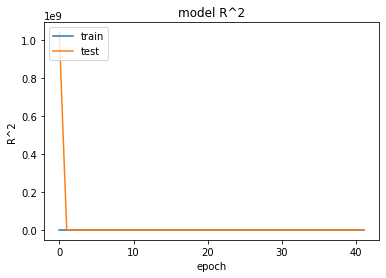

In [76]:
plt.plot(result.history['val_r_2'])
plt.plot(result.history['r_2'])
plt.title('model R^2')
plt.xlabel('epoch')
plt.ylabel('R^2')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

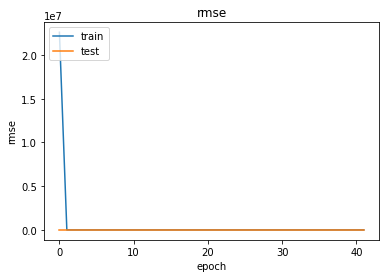

In [77]:
plt.plot(result.history['rmse'])
plt.plot(result.history['val_rmse'])
plt.title('rmse')
plt.xlabel('epoch')
plt.ylabel('rmse')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [78]:
regressor = LinearRegression()
regressor.fit(y_test.values.reshape(-1, 1), y_pred)
y_fit = regressor.predict(y_pred)

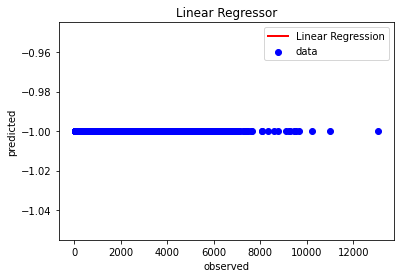

In [79]:
plt.scatter(y_test, y_pred, color='blue', label='data')
plt.plot(y_pred, y_fit, color='red', linewidth=2, label='Linear Regression')
plt.title('Linear Regressor')
plt.legend()
plt.xlabel('observed')
plt.ylabel('predicted')
plt.show()

In [80]:
print("Mean Absolute Error (MAE): %f" % sklearn.metrics.mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): %f" % math.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred)))
print("R square (R^2): %f" % sklearn.metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 2168.523747
Root Mean Squared Error (RMSE): 2752.992474
R square (R^2): -1.634813


#### Using selu for hidden layers

**Scaled Exponential Linear Unit (SELU)**<br>

The Scaled Exponential Linear Unit (SELU) activation function is defined as:<br>

if x > 0: return scale * x<br>
if x < 0: return scale * alpha * (exp(x) - 1)<br>
where alpha and scale are pre-defined constants (alpha=1.67326324 and scale=1.05070098).

In [89]:
model = keras.models.Sequential()

model.add(keras.layers.normalization.BatchNormalization())

# add input layer
model.add(keras.layers.Dense(units=100, input_dim=x_train.shape[1], activation='selu'))

# add hidden layer
model.add(keras.layers.Dense(units=50, input_dim=100, activation='selu'))

# add output layer
model.add(keras.layers.Dense(units=1, input_dim=50, activation='selu'))

In [90]:
model.compile(optimizer=keras.optimizers.SGD(lr=0.001),
              loss="mean_squared_error",
              metrics=["mean_squared_error", rmse, r_2])
early_stop = keras.callbacks.EarlyStopping(monitor="mean_squared_error", patience=40, verbose=False, mode='auto')
result = model.fit(x_train, y_train, epochs=300, batch_size=1024, 
                   validation_data=(x_test, y_test), callbacks=[early_stop], verbose=False);


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [91]:
y_pred = model.predict(x_test)

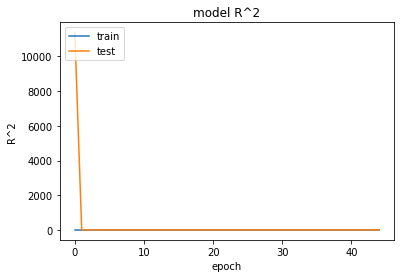

In [92]:
plt.plot(result.history['val_r_2'])
plt.plot(result.history['r_2'])
plt.title('model R^2')
plt.xlabel('epoch')
plt.ylabel('R^2')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

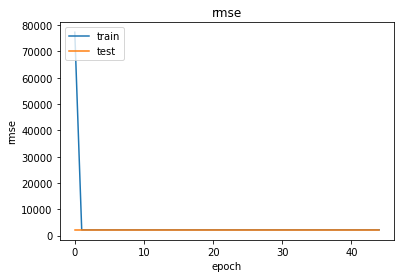

In [93]:
plt.plot(result.history['rmse'])
plt.plot(result.history['val_rmse'])
plt.title('rmse')
plt.xlabel('epoch')
plt.ylabel('rmse')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [94]:
regressor = LinearRegression()
regressor.fit(y_test.values.reshape(-1, 1), y_pred)
y_fit = regressor.predict(y_pred)

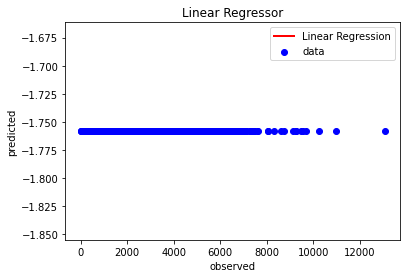

In [95]:
plt.scatter(y_test, y_pred, color='blue', label='data')
plt.plot(y_pred, y_fit, color='red', linewidth=2, label='Linear Regression')
plt.title('Linear Regressor')
plt.legend()
plt.xlabel('observed')
plt.ylabel('predicted')
plt.show()

In [96]:
print("Mean Absolute Error (MAE): %f" % sklearn.metrics.mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): %f" % math.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred)))
print("R square (R^2): %f" % sklearn.metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 2169.281847
Root Mean Squared Error (RMSE): 2753.589666
R square (R^2): -1.635957
